In [1]:
from os import listdir
from os.path import join, isfile
from typing import List

In [2]:
def get_data_from_file(path: str):
    with open(path, "r") as f:
        data: List[List[int]] = []
        lines = f.readlines()
        for line in lines:
            data.append([int(c) for c in line.split()])
        return data


def get_paths_of_dir(path: str, extension: str):
    return [join(path, f) for f in listdir(path)
            if isfile(join(path, f)) and f.endswith(extension)]

In [3]:
inDirPath = "../../Input/"
inPaths = get_paths_of_dir(inDirPath, extension=".in")

In [4]:
n_problem = int(input("Elige el problema (1-5): "))

inDirFiles = listdir(inDirPath)
file_name = inDirFiles[n_problem - 1]

path = inPaths[n_problem - 1]
prob = get_data_from_file(path)

In [5]:
import random
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms

## Variable meanings.

* R = Number of rows.
* C = Number of columns.
* F = Number of vehicles.
* N = Pre-booked rides.
* B = Per-ride bonus for starting the ride on time.
* T = Simulation steps = distance between start and end.

In [6]:
# Problem data.
_, _, F, N, B, T = prob[0]

# Rides.
rides = prob[1:]

Bonus:
* Earn points proportional to distance of ride.
* Bonus if started on time. 

In [7]:
toolbox = base.Toolbox()

In [8]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [9]:
toolbox.register("attribute", random.randint, 0, F - 1)
toolbox.register("individual", tools.initRepeat,
                 creator.Individual, toolbox.attribute, n=N)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [10]:
def sort_rides(vehicle_rides):
    def sort_ride(ride):
        a, b, x, y, s, f = ride[1]
        origin = [a, b]
        destiny = [x, y]
        distance = dis(origin, destiny)

        return s + f - distance
    
    return sorted(vehicle_rides, key=lambda ride: sort_ride(ride))

def get_rides_from_ind(individual):
    vehicles_rides = np.full(F, None)
    
    for i, vehicle in enumerate(individual):
        v_r = vehicles_rides[vehicle]
        
        if v_r is None:
            v_r = []
            
        ride = rides[i]
        v_r.append([i, ride])
        
        vehicles_rides[vehicle] = v_r

    return vehicles_rides

def dis(a, b): return np.abs(a[0] - b[0]) + np.abs(a[1]-b[1])


In [11]:
def calc_fitness(car_rides):
    fitness = 0
    step = 0
    pos = [0, 0]
    
    # Sort car_rides given earliest time.
    car_rides = sort_rides(car_rides)

    for _, ride in car_rides:
        a, b, x, y, s, f = ride
        origin = [a, b]
        destiny = [x, y]
        earliest_start = s
        latest_finish = f
        
        # 1.- Go to origin.
        step += dis(pos, origin)
        
        # 2.- If arrived before the earliest time. Wait and earn bonus.
        if step <= earliest_start:
          fitness += B
          step = earliest_start
          
        # 3.- Go to destiny.
        dis_ori_des = dis(origin, destiny)
        step += dis_ori_des
        
        #4.- If reached destiny before latest finish. Earn points.
        if step <= latest_finish:
          fitness += dis_ori_des
          
        # 5.- Update position.
        pos = destiny
                  
        # 6.- Check if reached max distance with one vehicle.
        if step > T:
          break
    
    return fitness
        
def eval_ind(ind):
    all_rides = get_rides_from_ind(ind)

    fitness = 0

    for car_rides in all_rides:
        if car_rides is not None:
            fitness += calc_fitness(car_rides)

    return fitness,


In [12]:
NIND = 50

pop = toolbox.population(n=NIND)
print(f"Population: {pop}")

Population: [[380, 35, 259, 282, 319, 221, 77, 239, 75, 189, 198, 70, 206, 88, 102, 84, 300, 43, 141, 272, 143, 350, 64, 64, 357, 342, 81, 230, 29, 399, 318, 26, 35, 31, 46, 291, 288, 376, 300, 302, 232, 259, 208, 60, 150, 99, 183, 105, 304, 90, 176, 89, 37, 26, 364, 37, 3, 202, 369, 359, 287, 141, 147, 204, 222, 115, 388, 9, 397, 314, 184, 37, 308, 316, 375, 331, 221, 272, 224, 136, 302, 223, 0, 90, 179, 118, 393, 232, 207, 49, 178, 162, 149, 58, 347, 145, 129, 325, 152, 203, 188, 244, 222, 214, 386, 78, 395, 77, 228, 221, 221, 77, 319, 391, 372, 321, 363, 157, 63, 159, 340, 117, 71, 197, 9, 120, 212, 269, 302, 275, 157, 322, 160, 139, 86, 218, 339, 52, 120, 372, 197, 75, 228, 274, 121, 308, 26, 21, 53, 25, 124, 27, 9, 357, 237, 165, 78, 326, 290, 207, 376, 219, 395, 294, 188, 112, 319, 391, 13, 98, 258, 392, 319, 193, 62, 14, 315, 349, 199, 123, 232, 98, 138, 14, 93, 78, 119, 119, 315, 30, 84, 194, 57, 69, 105, 74, 299, 181, 44, 42, 244, 145, 12, 308, 289, 110, 286, 0, 64, 292, 395, 

In [13]:
ind = toolbox.individual()

print("Individuo ANTES de evaluar")
print(ind)
print(ind.fitness.valid)
print("\n")

ind.fitness.values = eval_ind(ind)

print("Individuo TRAS evaluar")
print(ind)
print(ind.fitness.valid)
print(ind.fitness)

Individuo ANTES de evaluar
[92, 54, 364, 107, 127, 378, 115, 106, 62, 177, 287, 175, 88, 12, 144, 227, 256, 160, 54, 366, 225, 304, 152, 125, 82, 368, 391, 107, 5, 280, 125, 195, 188, 62, 87, 52, 57, 343, 153, 156, 141, 206, 131, 262, 13, 186, 247, 284, 171, 34, 242, 384, 140, 166, 153, 311, 110, 167, 163, 154, 129, 210, 363, 193, 394, 268, 180, 279, 89, 16, 213, 374, 70, 29, 10, 239, 253, 259, 68, 119, 290, 218, 179, 36, 375, 64, 356, 203, 176, 376, 13, 72, 336, 147, 214, 78, 20, 331, 149, 111, 71, 142, 251, 194, 325, 316, 291, 179, 174, 84, 70, 28, 353, 125, 243, 71, 303, 142, 249, 38, 354, 81, 53, 152, 298, 44, 119, 172, 340, 194, 344, 217, 371, 250, 115, 393, 198, 14, 132, 14, 24, 205, 335, 65, 27, 143, 91, 279, 5, 353, 352, 177, 177, 345, 288, 197, 182, 182, 393, 337, 144, 283, 171, 318, 1, 212, 36, 228, 225, 174, 218, 229, 163, 40, 87, 361, 104, 180, 64, 331, 256, 221, 275, 375, 318, 0, 397, 126, 92, 247, 270, 314, 125, 190, 364, 145, 70, 134, 382, 57, 7, 27, 204, 158, 167, 171, 

In [14]:
TOURNSIZE, INDPB = 3, 0.05

toolbox.register("select", tools.selTournament, tournsize=TOURNSIZE)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=INDPB)
toolbox.register("evaluate", eval_ind)

In [15]:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("std", np.std)
stats.register("min", np.min)
stats.register("max", np.max)

In [16]:
CXPB, MUTPB, NGEN = 1.0, 0.075, 15

pop, logbook = algorithms.eaSimple(
    pop, toolbox, CXPB, MUTPB, NGEN, stats, verbose=False)

best_sol = tools.selBest(pop, 1)[0]

print(f"El resultado de la evolución es:")
print(logbook)
print(f"La mejor solucion encontrada es: {best_sol}")


El resultado de la evolución es:
gen	nevals	avg        	std    	min        	max        
0  	50    	4.38926e+06	59564  	4.25868e+06	4.51445e+06
1  	50    	4.4193e+06 	49785.9	4.27615e+06	4.53035e+06
2  	50    	4.43393e+06	45636.4	4.30815e+06	4.55071e+06
3  	50    	4.44094e+06	52575.4	4.31576e+06	4.52931e+06
4  	50    	4.46931e+06	49884  	4.32326e+06	4.60052e+06
5  	50    	4.46811e+06	65868.4	4.30031e+06	4.59589e+06
6  	50    	4.48901e+06	59362.4	4.34641e+06	4.62709e+06
7  	50    	4.50434e+06	65560  	4.30975e+06	4.64022e+06
8  	50    	4.54157e+06	65416.3	4.39287e+06	4.7289e+06 
9  	50    	4.58003e+06	53646.2	4.44381e+06	4.70621e+06
10 	50    	4.61727e+06	46097.8	4.5076e+06 	4.7289e+06 
11 	50    	4.65126e+06	49375  	4.52878e+06	4.75131e+06
12 	50    	4.68469e+06	35662.2	4.60847e+06	4.75285e+06
13 	50    	4.70583e+06	31384.2	4.6238e+06 	4.76048e+06
14 	50    	4.72756e+06	24512.4	4.65766e+06	4.78962e+06
15 	50    	4.7427e+06 	18132.2	4.70732e+06	4.81784e+06
La mejor solucion encontrada es:

[]

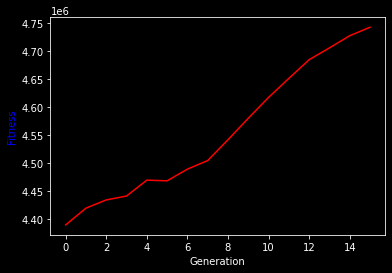

In [17]:
gen = logbook.select("gen")
avgs = logbook.select("avg")

fig = plt.figure()

ax = plt.gca()
line = ax.plot(gen, avgs, "r-", label="Average Fitness")
ax.set_xlabel("Generation")
ax.set_ylabel("Fitness", color="b")

plt.plot()

In [18]:
outDirPath = "../../Output/"
outFilePath = outDirPath + file_name.strip(".in") + ".out"

vehicles_rides = get_rides_from_ind(best_sol)

with open(outFilePath, "w") as f:
    for v_r in vehicles_rides:
      if v_r is None:
        f.write(str(0))
      else:
        v_r = sort_rides(v_r)    
        f.write(str(len(v_r)))
        f.write(" ")
        f.write(" ".join(str(pos) for pos, _ in v_r))
      
      f.write("\n")